# 1. 대통령 연설문 텍스트 마이닝

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import konlpy
import PIL
from wordcloud import WordCloud

yun = open('speech_Yun.txt', encoding = 'UTF-8').read()
yun

'존경하는 국민 여러분\n\n지난 3월초 공직에서 물러난 후, 많은 분들을 만났습니다. 한결같이 나라의 앞날을 먼저 걱정하셨습니다. 도대체 나라가 이래도 되는 거냐고 하셨습니다.\n\n천안함 청년 전준영은 분노하고 있었습니다. K-9 청년 이찬호는 억울해서가 아니라 잊혀지지 않기 위해서 책을 썼습니다. 살아남은 영웅들은 살아있음을 오히려 고통스러워했습니다. 국가를 지키고 국민을 지킨 우리를 왜 국가는 내팽개치는 거냐고. 마포의 자영업자는 도대체 언제까지 버텨야 하는 거냐고, 국가는 왜 희생만을 요구하는 거냐고 물었습니다. 대한민국을 만들고 지킨 영웅들입니다. 저 윤석열은 그 분들과 함께 하겠습니다. 산업화와 민주화로 지금의 대한민국을 만든 위대한 국민, 그 국민의 상식으로부터 출발하겠습니다.\n\n그 상식을 무기로, 무너진 자유민주주의와 법치, 시대와 세대를 관통하는 공정의 가치를 기필코 다시 세우겠습니다. 정의가 무엇인지 고민하기 전에 누구나 정의로움을 일상에서 느낄 수 있게 하겠습니다. 이것이 제 가슴에 새긴 사명입니다.\n\n4년 전 문재인 정권은 국민들의 기대와 여망으로 출범했습니다.‘기회는 평등하고 과정은 공정하며 결과는 정의로운 나라’ ‘특권과 반칙 없는 나라’를 만들겠다고 약속했습니다. 우리 모두 똑똑히 기억하고 있습니다. 그런데 그동안 어땠습니까?\n\n경제 상식을 무시한 소득주도성장, 시장과 싸우는 주택정책, 법을 무시하고 세계 일류 기술을 사장시킨 탈원전, 매표에 가까운 포퓰리즘 정책으로 수많은 청년, 자영업자, 중소기업인, 저임금 근로자들이 고통을 받았습니다. 정부 부채 급증으로 변변한 일자리도 찾지 못한 청년 세대들이 엄청난 미래 부채를 떠안았습니다. 청년들이 겨우 일자리를 구해도 폭등하는 집값을 바라보며 한숨만 쉬고 있습니다. 청년들의 좌절은 대한민국을 인구절벽으로 몰아 가고 있습니다.\n\n국민을 내 편 네 편으로 갈라 상식과 공정, 법치를 내팽개쳐 나라의 근간을 무너뜨리고 국민을 좌절과 분노에 빠지게 하였습니다. 이 정권이 저지른 무

In [138]:
# 불필요한 문자 제거
import re
yun = re.sub('[^가-힣]', ' ', yun)
yun

'존경하는 국민 여러분  지난  월초 공직에서 물러난 후  많은 분들을 만났습니다  한결같이 나라의 앞날을 먼저 걱정하셨습니다  도대체 나라가 이래도 되는 거냐고 하셨습니다   천안함 청년 전준영은 분노하고 있었습니다      청년 이찬호는 억울해서가 아니라 잊혀지지 않기 위해서 책을 썼습니다  살아남은 영웅들은 살아있음을 오히려 고통스러워했습니다  국가를 지키고 국민을 지킨 우리를 왜 국가는 내팽개치는 거냐고  마포의 자영업자는 도대체 언제까지 버텨야 하는 거냐고  국가는 왜 희생만을 요구하는 거냐고 물었습니다  대한민국을 만들고 지킨 영웅들입니다  저 윤석열은 그 분들과 함께 하겠습니다  산업화와 민주화로 지금의 대한민국을 만든 위대한 국민  그 국민의 상식으로부터 출발하겠습니다   그 상식을 무기로  무너진 자유민주주의와 법치  시대와 세대를 관통하는 공정의 가치를 기필코 다시 세우겠습니다  정의가 무엇인지 고민하기 전에 누구나 정의로움을 일상에서 느낄 수 있게 하겠습니다  이것이 제 가슴에 새긴 사명입니다    년 전 문재인 정권은 국민들의 기대와 여망으로 출범했습니다  기회는 평등하고 과정은 공정하며 결과는 정의로운 나라   특권과 반칙 없는 나라 를 만들겠다고 약속했습니다  우리 모두 똑똑히 기억하고 있습니다  그런데 그동안 어땠습니까   경제 상식을 무시한 소득주도성장  시장과 싸우는 주택정책  법을 무시하고 세계 일류 기술을 사장시킨 탈원전  매표에 가까운 포퓰리즘 정책으로 수많은 청년  자영업자  중소기업인  저임금 근로자들이 고통을 받았습니다  정부 부채 급증으로 변변한 일자리도 찾지 못한 청년 세대들이 엄청난 미래 부채를 떠안았습니다  청년들이 겨우 일자리를 구해도 폭등하는 집값을 바라보며 한숨만 쉬고 있습니다  청년들의 좌절은 대한민국을 인구절벽으로 몰아 가고 있습니다   국민을 내 편 네 편으로 갈라 상식과 공정  법치를 내팽개쳐 나라의 근간을 무너뜨리고 국민을 좌절과 분노에 빠지게 하였습니다  이 정권이 저지른 무도한 행태는 일일이 나

In [139]:
hannanum = konlpy.tag.Hannanum()

# 명사 추출
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [140]:
# 연설문에서 명사 추출
nouns = hannanum.nouns(yun)
nouns

['존경',
 '국민',
 '여러분',
 '월초',
 '공직',
 '후',
 '들',
 '나라',
 '앞날',
 '걱정',
 '나라',
 '것',
 '천안함',
 '청년',
 '전준영',
 '분노',
 '청년',
 '이찬호',
 '억울해서',
 '책',
 '영웅들',
 '고통',
 '국가',
 '국민',
 '우리',
 '국가',
 '것',
 '마포',
 '자영업자',
 '언제',
 '것',
 '국가',
 '희생만',
 '요구',
 '것',
 '대한민국',
 '영웅들',
 '윤석열은',
 '들',
 '산업화',
 '민주화',
 '지금',
 '대한민국',
 '위대한',
 '국민',
 '국민',
 '상식',
 '출발',
 '상식',
 '무기',
 '자유민주주의',
 '법치',
 '시대',
 '세대',
 '관통',
 '공정',
 '가치',
 '정의',
 '무엇',
 '고민',
 '전',
 '누구',
 '정의',
 '일상',
 '수',
 '이것',
 '저',
 '가슴',
 '사명',
 '년',
 '전',
 '문재',
 '정권',
 '국민들',
 '기대',
 '여망',
 '출범',
 '기회',
 '평등',
 '과정',
 '공정',
 '결과',
 '정의로운',
 '나',
 '특권',
 '반칙',
 '나',
 '를',
 '약속',
 '우리',
 '기억',
 '그동안',
 '경제',
 '상식',
 '무시',
 '소득주도성장',
 '시장',
 '주택정책',
 '법',
 '무시',
 '세계',
 '일류',
 '기술',
 '사장',
 '원전',
 '매표',
 '포퓰리즘',
 '정책',
 '청년',
 '자영업자',
 '중소기업',
 '저임금',
 '근로자들',
 '고통',
 '정부',
 '부채',
 '급증',
 '변변',
 '일자리',
 '청년',
 '세대들',
 '미래',
 '부채',
 '떠안았습니다',
 '청년들',
 '일자리',
 '폭등',
 '집값',
 '한숨',
 '청년들',
 '좌절',
 '대한민국',
 '인구절벽',
 '국민',
 '편',
 '네',
 '편',
 '상식'

In [141]:
# 데이터 프레임으로 변환
df_word = pd.DataFrame({'word' : nouns})
df_word

,word
0,존경
1,국민
2,여러분
3,월초
4,공직
...,...
644,국민
645,여러분
646,우리
647,수


In [142]:
# 글자 수 추가
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,존경,2
1,국민,2
2,여러분,3
3,월초,2
4,공직,2
...,...,...
644,국민,2
645,여러분,3
646,우리,2
647,수,1


In [143]:
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word.sort_values('count')

,word,count
0,존경,2
403,기만,2
401,이상,2
399,우리,2
398,앞날,2
...,...,...
214,자유민주국가,6
50,자유민주주의,6
244,자유민주주의,6
374,자유민주주의,6


In [144]:
# 단어 빈도 구하기
df_word = df_word.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)
df_word

,word,n
36,국민,21
207,자유,13
174,우리,13
37,국민들,9
59,나라,9
...,...,...
119,사유,1
120,사유화,1
121,사이,1
122,사장,1


In [145]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
36,국민,21
207,자유,13
174,우리,13
37,국민들,9
59,나라,9
218,정권,8
98,법치,8
20,공정,8
128,상식,7
54,기술,7


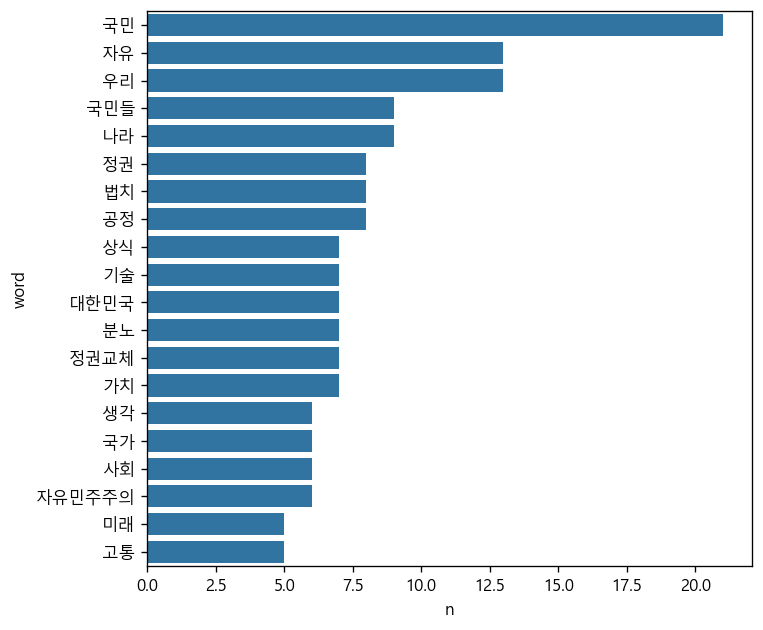

In [146]:
plt.rcParams.update({'font.family' : 'Malgun Gothic', 'figure.dpi' : '120', 'figure.figsize' : [6.5, 6]})

# 막대그래프 만들기
sns.barplot(data = top20, x = 'n', y = 'word');

In [147]:
font = 'DoHyeon-Regular.ttf'

# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'국민': 21,
 '자유': 13,
 '우리': 13,
 '국민들': 9,
 '나라': 9,
 '정권': 8,
 '법치': 8,
 '공정': 8,
 '상식': 7,
 '기술': 7,
 '대한민국': 7,
 '분노': 7,
 '정권교체': 7,
 '가치': 7,
 '생각': 6,
 '국가': 6,
 '사회': 6,
 '자유민주주의': 6,
 '미래': 5,
 '고통': 5,
 '혁신': 5,
 '민주주의': 5,
 '시대': 4,
 '국제': 4,
 '권력': 4,
 '가지': 4,
 '정치': 4,
 '사람': 4,
 '청년': 4,
 '세력': 4,
 '집권': 4,
 '준비': 4,
 '청년들': 4,
 '경제': 4,
 '연장': 4,
 '여러분': 4,
 '누구': 3,
 '헌신': 3,
 '카르텔': 3,
 '이권': 3,
 '공유': 3,
 '해결': 3,
 '기회': 3,
 '혁명': 3,
 '공직': 3,
 '민주화': 2,
 '정부': 2,
 '창의': 2,
 '정의': 2,
 '진짜': 2,
 '위대한': 2,
 '때문': 2,
 '지금': 2,
 '현안': 2,
 '격려': 2,
 '문제': 2,
 '좌절': 2,
 '산업화': 2,
 '존엄': 2,
 '일자리': 2,
 '중요': 2,
 '무시': 2,
 '변화': 2,
 '부패': 2,
 '자유민주주': 2,
 '약탈': 2,
 '그동안': 2,
 '이상': 2,
 '근간': 2,
 '전제': 2,
 '영웅들': 2,
 '승자': 2,
 '자영업자': 2,
 '기반': 2,
 '열망': 2,
 '앞날': 2,
 '과정': 2,
 '과거': 2,
 '사퇴': 2,
 '평등': 2,
 '부채': 2,
 '일해': 1,
 '외교': 1,
 '자유민주국가': 1,
 '자양분': 1,
 '입장': 1,
 '요구': 1,
 '의미': 1,
 '일상': 1,
 '원전': 1,
 '이해관계': 1,
 '윤석열은': 1,
 '의지': 1,
 '윤석열': 1,
 '이것': 1,
 '윤리의식': 1,


In [148]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white')  # 배경색

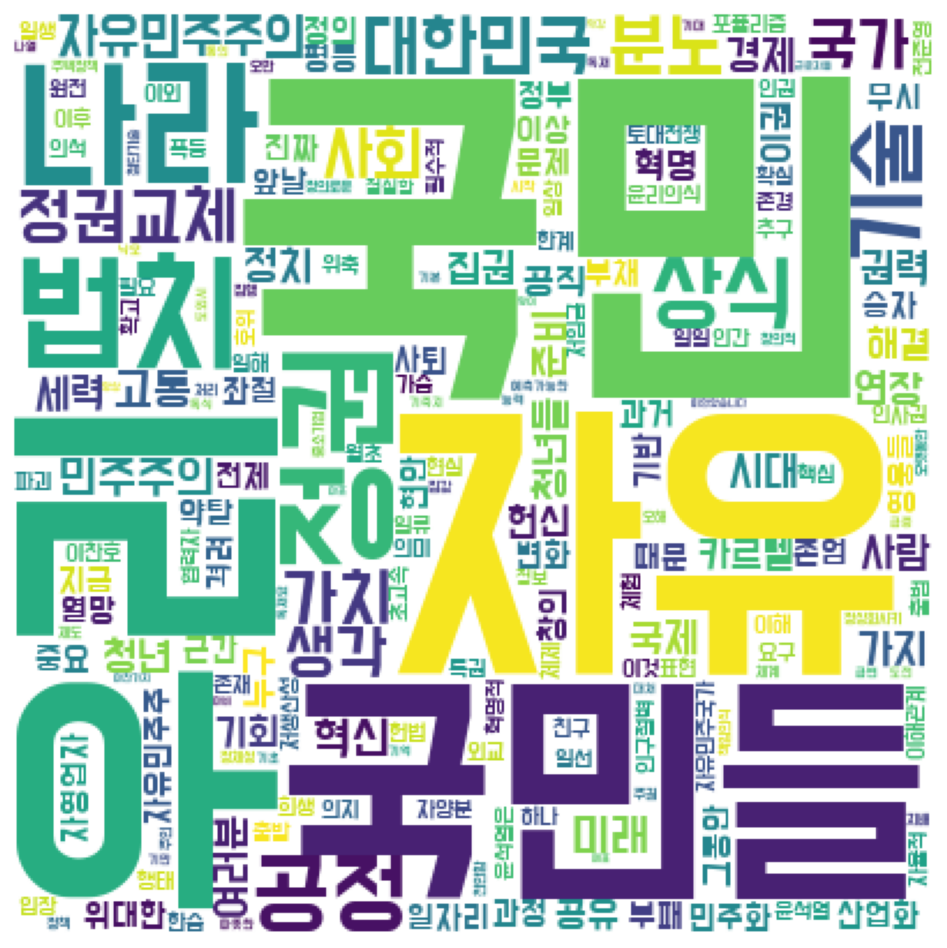

In [149]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);      # 워드 클라우드 출력

In [150]:
icon = PIL.Image.open('cloud.png')
# 불러온 이미지 파일로 mask를 생성
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

In [151]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

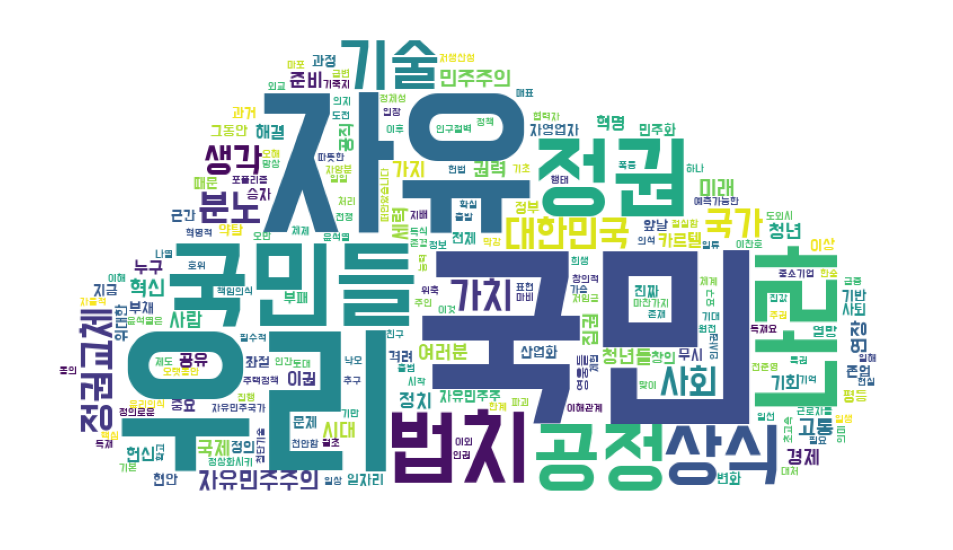

In [152]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);      # 워드 클라우드 출력

In [153]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img,                  # mask 설정
               colormap = 'inferno')        # 컬러맵 설정

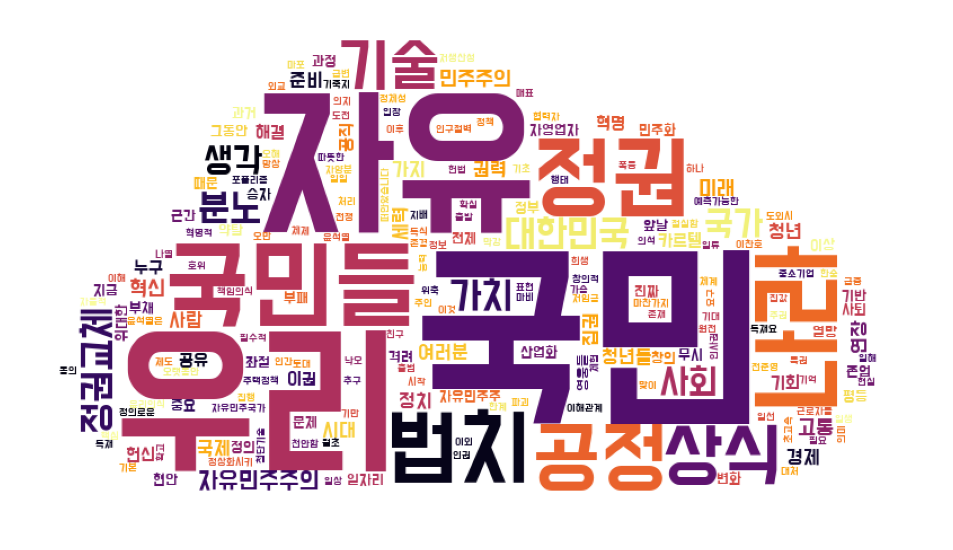

In [154]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);      # 워드 클라우드 출력